In [1]:
import os
import numpy as np
import pandas as pd
import itertools
from sklearn.cluster import KMeans
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection
import diffxpy.api as de
import anndata
import umap.umap_ as umap
import scanpy as sc
import seaborn as sns; sns.set_theme()
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
import pickle5 as pickle
import multiprocessing as mp
import json
from funcs import *

C:\Users\hadas\AppData\Roaming\Python\Python37\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:
rand_ind2 = pd.read_csv("D:\\OneDrive - Technion\\SPIRAL_for_paper\\comparison_of_all_methods_to_ground_truth_of_Splatter_dataset\\rand_ind2.csv",
                       index_col=0)
rand_ind2

,ARI,method
0,0.747989,SPIRAL (Jaccard index=0.05)
1,0.728494,SPIRAL (Jaccard index=0.05)
2,0.736240,SPIRAL (Jaccard index=0.05)
3,0.731570,SPIRAL (Jaccard index=0.05)
4,0.732977,SPIRAL (Jaccard index=0.05)
...,...,...
115,0.705903,SingleCellHaystack (k=6)
116,0.711319,SingleCellHaystack (k=6)
117,0.707451,SingleCellHaystack (k=6)
118,0.708497,SingleCellHaystack (k=6)


In [102]:
rand_ind2.columns = ['FRI', 'method']
rand_ind2.loc[:, 'method'] = [s.replace('Jaccard index', 'JaccThr') for s in rand_ind2.loc[:, 'method']]
rand_ind2

,FRI,method
0,0.747989,SPIRAL (JaccThr=0.05)
1,0.728494,SPIRAL (JaccThr=0.05)
2,0.736240,SPIRAL (JaccThr=0.05)
3,0.731570,SPIRAL (JaccThr=0.05)
4,0.732977,SPIRAL (JaccThr=0.05)
...,...,...
115,0.705903,SingleCellHaystack (k=6)
116,0.711319,SingleCellHaystack (k=6)
117,0.707451,SingleCellHaystack (k=6)
118,0.708497,SingleCellHaystack (k=6)


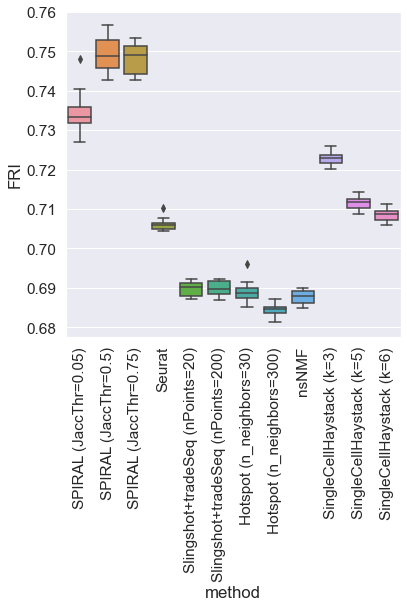

In [117]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=rand_ind2, y="FRI", x="method")
plt.xticks(rotation=90)
#plt.show()
plt.savefig('./comparison_of_all_methods_to_ground_truth_of_Splatter_dataset/FRI.jpg', bbox_inches = "tight")
plt.savefig('./comparison_of_all_methods_to_ground_truth_of_Splatter_dataset/FRI.eps', bbox_inches = "tight", format='eps')

In [107]:
jaccard_list = pd.read_csv("D:\\OneDrive - Technion\\SPIRAL_for_paper\\comparison_of_all_methods_to_ground_truth_of_Splatter_dataset\\jaccard_list.csv",
                       index_col=0)
jaccard_list

,method,best_Jaccard_index_for_cluster
0,SPIRAL (Jaccard index=0.05),0.177022
1,SPIRAL (Jaccard index=0.05),0.079915
2,SPIRAL (Jaccard index=0.05),0.251788
3,SPIRAL (Jaccard index=0.05),0.216216
4,SPIRAL (Jaccard index=0.05),0.208604
...,...,...
715,SingleCellHaystack (k=6),0.041207
716,SingleCellHaystack (k=6),0.080829
717,SingleCellHaystack (k=6),0.026091
718,SingleCellHaystack (k=6),0.068393


In [108]:
jaccard_list.columns = ['method', 'best Jaccard index for true cluster']
jaccard_list.loc[:, 'method'] = [s.replace('Jaccard index', 'JaccThr') for s in jaccard_list.loc[:, 'method']]
jaccard_list

,method,best Jaccard index for true cluster
0,SPIRAL (JaccThr=0.05),0.177022
1,SPIRAL (JaccThr=0.05),0.079915
2,SPIRAL (JaccThr=0.05),0.251788
3,SPIRAL (JaccThr=0.05),0.216216
4,SPIRAL (JaccThr=0.05),0.208604
...,...,...
715,SingleCellHaystack (k=6),0.041207
716,SingleCellHaystack (k=6),0.080829
717,SingleCellHaystack (k=6),0.026091
718,SingleCellHaystack (k=6),0.068393


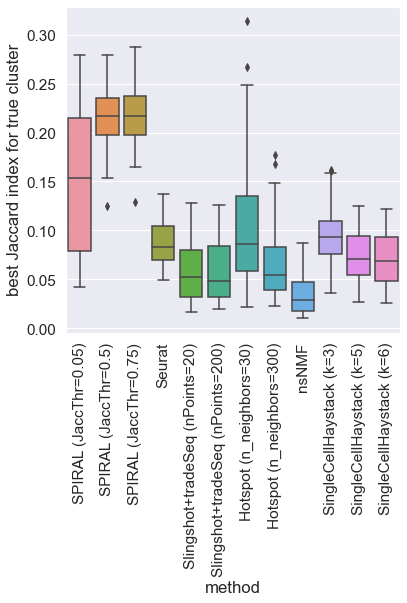

In [118]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=jaccard_list, y="best Jaccard index for true cluster", x="method")
plt.xticks(rotation=90)
#plt.show()
plt.savefig('./comparison_of_all_methods_to_ground_truth_of_Splatter_dataset/bestJacInd.jpg', bbox_inches = "tight")
plt.savefig('./comparison_of_all_methods_to_ground_truth_of_Splatter_dataset/bestJacInd.eps', bbox_inches = "tight", format='eps')

In [111]:
method_sizes = pd.read_csv("D:\\OneDrive - Technion\\SPIRAL_for_paper\\comparison_of_all_methods_to_ground_truth_of_Splatter_dataset\\method_sizes.csv",
                       index_col=0)
method_sizes

,True clusters,SPIRAL (Jaccard index=0.05),SPIRAL (Jaccard index=0.5),SPIRAL (Jaccard index=0.75),Seurat,Slingshot+tradeSeq (nPoints=20),Slingshot+tradeSeq (nPoints=200),Hotspot (n_neighbors=30),Hotspot (n_neighbors=300),nsNMF,SingleCellHaystack (k=3),SingleCellHaystack (k=5),SingleCellHaystack (k=6)
51,"[2026, 1953, 2051, 1948, 1993, 2056]","[361, 423, 100, 574, 482, 491]","[361, 423, 100, 288, 594, 283, 574, 482, 166, ...","[361, 423, 100, 378, 190, 288, 594, 283, 574, ...","[239, 1, 479, 50, 5, 525, 174, 152, 110]","[268, 122, 52, 50, 187, 45, 33, 110, 41, 32, 4...","[274, 104, 29, 177, 43, 43, 103, 31, 26, 60, 3...","[544, 237, 119, 129, 64, 81, 17, 23, 58, 47, 3...","[90, 149, 141, 118, 93, 63, 17, 45, 22, 27, 38...","[60, 52, 79, 30, 47, 21, 64, 24, 42, 103, 109,...","[395, 322, 283]","[155, 163, 159, 240, 283]","[155, 163, 159, 240, 215, 68]"
52,"[2049, 1995, 2025, 1986, 2070, 2013]","[466, 160, 283, 540]","[466, 160, 183, 293, 283, 638, 544, 490, 323, ...","[466, 160, 183, 416, 293, 283, 638, 264, 544, ...","[2, 536, 86, 72, 215, 273, 173, 9, 696, 154]","[234, 75, 24, 51, 27, 179, 31, 122, 29, 22, 24...","[254, 68, 59, 74, 205, 30, 23, 97, 33, 30, 20,...","[214, 67, 378, 105, 23, 312, 22, 23, 22, 33, 3...","[203, 58, 169, 77, 19, 127, 26, 31, 23, 26, 20...","[61, 166, 116, 33, 75, 46, 36, 39, 23, 39, 21,...","[449, 233, 318]","[311, 87, 138, 146, 318]","[311, 72, 138, 146, 318, 15]"
53,"[2038, 1975, 2085, 1980, 1996, 1925]","[315, 510, 337, 282, 327, 215, 441]","[315, 510, 122, 337, 369, 542, 302, 391, 251, ...","[315, 510, 122, 176, 286, 337, 369, 542, 291, ...","[61, 2, 493, 76, 246, 5, 546, 146, 104, 160]","[296, 66, 157, 29, 266, 38, 132, 34, 45, 23, 2...","[231, 55, 164, 134, 39, 51, 97, 70, 78, 64, 24...","[526, 121, 193, 166, 63, 179, 25, 23, 19, 38, ...","[98, 128, 146, 68, 63, 50, 20, 19, 31, 17, 15,...","[61, 91, 93, 57, 57, 32, 53, 27, 31, 29, 55, 2...","[466, 168, 366]","[93, 168, 152, 366, 221]","[93, 168, 152, 179, 221, 187]"
54,"[1960, 2048, 2070, 1949, 1983, 2032]","[322, 232, 445, 470, 249, 119, 319]","[322, 232, 445, 94, 470, 233, 191, 249, 394, 1...","[322, 232, 445, 170, 94, 470, 457, 233, 191, 2...","[1, 491, 64, 107, 75, 241, 3, 558, 164]","[212, 75, 65, 147, 65, 168, 131, 41, 56, 21, 3...","[229, 75, 59, 162, 51, 177, 140, 26, 33, 21, 4...","[373, 28, 241, 20, 199, 173, 29, 26, 53, 22, 1...","[337, 61, 24, 17, 223, 47, 17, 16, 15, 29, 15,...","[40, 121, 134, 21, 20, 31, 51, 29, 58, 67, 40,...","[205, 453, 342]","[205, 319, 134, 190, 152]","[205, 319, 134, 82, 152, 108]"
55,"[2066, 1971, 2087, 1953, 2020, 2037]","[333, 505, 121, 552, 317]","[333, 505, 121, 221, 552, 248, 432, 324, 344, ...","[333, 505, 121, 176, 322, 221, 552, 248, 432, ...","[67, 1, 538, 131, 79, 261, 192, 2, 660]","[28, 223, 243, 43, 63, 93, 110, 43, 26, 86, 38...","[28, 21, 257, 204, 42, 23, 32, 37, 134, 108, 3...","[277, 199, 70, 321, 529, 19, 31, 22, 98, 42, 1...","[294, 82, 105, 154, 130, 41, 16, 17, 29, 15, 1...","[44, 105, 183, 36, 33, 28, 22, 22, 32, 72, 43,...","[298, 375, 327]","[96, 126, 327, 202, 249]","[88, 126, 8, 327, 202, 249]"
56,"[2069, 1964, 2039, 1967, 2136, 2019]","[341, 481, 100, 467, 197, 422]","[341, 481, 100, 168, 243, 320, 467, 197, 166, ...","[341, 481, 100, 168, 243, 320, 467, 197, 166, ...","[206, 34, 236, 3, 574, 564, 120, 148, 173]","[81, 119, 206, 20, 220, 121, 42, 39, 75, 51, 4...","[240, 106, 21, 180, 21, 47, 38, 38, 28, 89, 49...","[185, 188, 76, 158, 134, 22, 15, 20, 25, 262, ...","[191, 113, 94, 90, 37, 23, 18, 15, 24, 15, 25,...","[55, 126, 139, 42, 28, 36, 33, 30, 55, 22, 35,...","[153, 458, 389]","[153, 125, 162, 333, 227]","[153, 125, 162, 191, 142, 227]"
57,"[1960, 1958, 1985, 2031, 2036, 1949]","[320, 493, 162, 97, 618]","[320, 493, 181, 162, 563, 257, 618, 520, 401, ...","[320, 493, 181, 162, 178, 324, 97, 563, 257, 6...","[77, 271, 2, 515, 62, 160, 194, 6, 672]","[70, 69, 176, 220, 24, 20, 159, 27, 77, 38, 29...","[76, 78, 186, 226, 37, 29, 32, 115, 101, 37, 3...","[650, 85, 325, 441, 

In [112]:
method_sizes.columns = [s.replace('Jaccard index', 'JaccThr') for s in method_sizes.columns]
method_sizes


,True clusters,SPIRAL (JaccThr=0.05),SPIRAL (JaccThr=0.5),SPIRAL (JaccThr=0.75),Seurat,Slingshot+tradeSeq (nPoints=20),Slingshot+tradeSeq (nPoints=200),Hotspot (n_neighbors=30),Hotspot (n_neighbors=300),nsNMF,SingleCellHaystack (k=3),SingleCellHaystack (k=5),SingleCellHaystack (k=6)
51,"[2026, 1953, 2051, 1948, 1993, 2056]","[361, 423, 100, 574, 482, 491]","[361, 423, 100, 288, 594, 283, 574, 482, 166, ...","[361, 423, 100, 378, 190, 288, 594, 283, 574, ...","[239, 1, 479, 50, 5, 525, 174, 152, 110]","[268, 122, 52, 50, 187, 45, 33, 110, 41, 32, 4...","[274, 104, 29, 177, 43, 43, 103, 31, 26, 60, 3...","[544, 237, 119, 129, 64, 81, 17, 23, 58, 47, 3...","[90, 149, 141, 118, 93, 63, 17, 45, 22, 27, 38...","[60, 52, 79, 30, 47, 21, 64, 24, 42, 103, 109,...","[395, 322, 283]","[155, 163, 159, 240, 283]","[155, 163, 159, 240, 215, 68]"
52,"[2049, 1995, 2025, 1986, 2070, 2013]","[466, 160, 283, 540]","[466, 160, 183, 293, 283, 638, 544, 490, 323, ...","[466, 160, 183, 416, 293, 283, 638, 264, 544, ...","[2, 536, 86, 72, 215, 273, 173, 9, 696, 154]","[234, 75, 24, 51, 27, 179, 31, 122, 29, 22, 24...","[254, 68, 59, 74, 205, 30, 23, 97, 33, 30, 20,...","[214, 67, 378, 105, 23, 312, 22, 23, 22, 33, 3...","[203, 58, 169, 77, 19, 127, 26, 31, 23, 26, 20...","[61, 166, 116, 33, 75, 46, 36, 39, 23, 39, 21,...","[449, 233, 318]","[311, 87, 138, 146, 318]","[311, 72, 138, 146, 318, 15]"
53,"[2038, 1975, 2085, 1980, 1996, 1925]","[315, 510, 337, 282, 327, 215, 441]","[315, 510, 122, 337, 369, 542, 302, 391, 251, ...","[315, 510, 122, 176, 286, 337, 369, 542, 291, ...","[61, 2, 493, 76, 246, 5, 546, 146, 104, 160]","[296, 66, 157, 29, 266, 38, 132, 34, 45, 23, 2...","[231, 55, 164, 134, 39, 51, 97, 70, 78, 64, 24...","[526, 121, 193, 166, 63, 179, 25, 23, 19, 38, ...","[98, 128, 146, 68, 63, 50, 20, 19, 31, 17, 15,...","[61, 91, 93, 57, 57, 32, 53, 27, 31, 29, 55, 2...","[466, 168, 366]","[93, 168, 152, 366, 221]","[93, 168, 152, 179, 221, 187]"
54,"[1960, 2048, 2070, 1949, 1983, 2032]","[322, 232, 445, 470, 249, 119, 319]","[322, 232, 445, 94, 470, 233, 191, 249, 394, 1...","[322, 232, 445, 170, 94, 470, 457, 233, 191, 2...","[1, 491, 64, 107, 75, 241, 3, 558, 164]","[212, 75, 65, 147, 65, 168, 131, 41, 56, 21, 3...","[229, 75, 59, 162, 51, 177, 140, 26, 33, 21, 4...","[373, 28, 241, 20, 199, 173, 29, 26, 53, 22, 1...","[337, 61, 24, 17, 223, 47, 17, 16, 15, 29, 15,...","[40, 121, 134, 21, 20, 31, 51, 29, 58, 67, 40,...","[205, 453, 342]","[205, 319, 134, 190, 152]","[205, 319, 134, 82, 152, 108]"
55,"[2066, 1971, 2087, 1953, 2020, 2037]","[333, 505, 121, 552, 317]","[333, 505, 121, 221, 552, 248, 432, 324, 344, ...","[333, 505, 121, 176, 322, 221, 552, 248, 432, ...","[67, 1, 538, 131, 79, 261, 192, 2, 660]","[28, 223, 243, 43, 63, 93, 110, 43, 26, 86, 38...","[28, 21, 257, 204, 42, 23, 32, 37, 134, 108, 3...","[277, 199, 70, 321, 529, 19, 31, 22, 98, 42, 1...","[294, 82, 105, 154, 130, 41, 16, 17, 29, 15, 1...","[44, 105, 183, 36, 33, 28, 22, 22, 32, 72, 43,...","[298, 375, 327]","[96, 126, 327, 202, 249]","[88, 126, 8, 327, 202, 249]"
56,"[2069, 1964, 2039, 1967, 2136, 2019]","[341, 481, 100, 467, 197, 422]","[341, 481, 100, 168, 243, 320, 467, 197, 166, ...","[341, 481, 100, 168, 243, 320, 467, 197, 166, ...","[206, 34, 236, 3, 574, 564, 120, 148, 173]","[81, 119, 206, 20, 220, 121, 42, 39, 75, 51, 4...","[240, 106, 21, 180, 21, 47, 38, 38, 28, 89, 49...","[185, 188, 76, 158, 134, 22, 15, 20, 25, 262, ...","[191, 113, 94, 90, 37, 23, 18, 15, 24, 15, 25,...","[55, 126, 139, 42, 28, 36, 33, 30, 55, 22, 35,...","[153, 458, 389]","[153, 125, 162, 333, 227]","[153, 125, 162, 191, 142, 227]"
57,"[1960, 1958, 1985, 2031, 2036, 1949]","[320, 493, 162, 97, 618]","[320, 493, 181, 162, 563, 257, 618, 520, 401, ...","[320, 493, 181, 162, 178, 324, 97, 563, 257, 6...","[77, 271, 2, 515, 62, 160, 194, 6, 672]","[70, 69, 176, 220, 24, 20, 159, 27, 77, 38, 29...","[76, 78, 186, 226, 37, 29, 32, 115, 101, 37, 3...","[650, 85, 325, 441, 137, 213, 48, 15, 

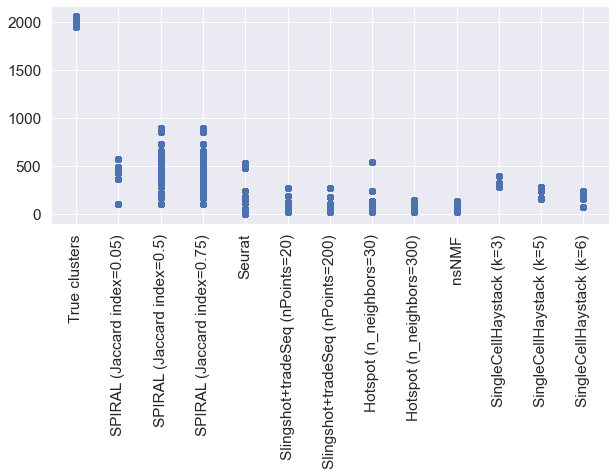

In [80]:
plt.figure(figsize=(10, 4))
for method in list(method_sizes):
    for data_n in method_sizes.index:
        a = method_sizes.loc[51, method].replace('[', '').replace(']', '').split(', ')
        a = [int(s) for s in a]
        plt.scatter([method]*len(a), a, color='b')
plt.xticks(rotation=90)
plt.show()

In [113]:
method_sizes2 = pd.DataFrame(columns=['method', 'module_size'])
for method in list(method_sizes):
    for data_n in method_sizes.index:
        a = method_sizes.loc[51, method].replace('[', '').replace(']', '').split(', ')
        a = [float(s) for s in a]
        df = pd.DataFrame(columns=['method', 'module_size'])
        df.loc[:, 'module_size'] = a
        df.loc[:, 'method'] = [method]*len(a)
        method_sizes2 = pd.concat((method_sizes2, df), ignore_index=True)
method_sizes2

,method,module_size
0,True clusters,2026.0
1,True clusters,1953.0
2,True clusters,2051.0
3,True clusters,1948.0
4,True clusters,1993.0
...,...,...
3145,SingleCellHaystack (k=6),163.0
3146,SingleCellHaystack (k=6),159.0
3147,SingleCellHaystack (k=6),240.0
3148,SingleCellHaystack (k=6),215.0


In [95]:
type(method_sizes2.loc[30, 'method'])

str

In [96]:
type(method_sizes2.loc[30, 'module_size'])

numpy.float64

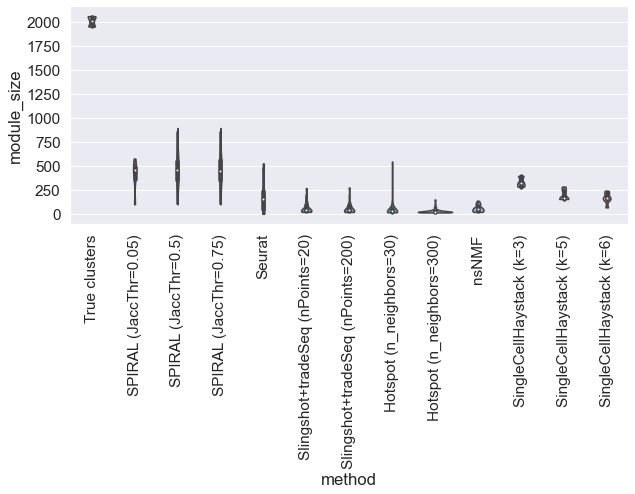

In [114]:
plt.figure(figsize=(10, 4))
sns.violinplot(data=method_sizes2, y="module_size", x="method", cut=0)
plt.yticks(np.arange(0, 2200, step=250))
plt.xticks(rotation=90)
plt.show()